In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_excel('Synthetic_Dataset.xlsx')

In [10]:
#data = pd.read_excel('\\Users\\Daniele\\Desktop\\PATTERN\\Synthetic_Dataset.xlsx')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2043 non-null   object 
 1   Gender                      2043 non-null   int64  
 2   AOD                         2043 non-null   float64
 3   Neutrophils                 2043 non-null   float64
 4   Hemoglobin                  2043 non-null   float64
 5   Platelets                   2043 non-null   float64
 6   BMB                         2043 non-null   float64
 7   BMRS                        2043 non-null   float64
 8   del5q                       2043 non-null   int64  
 9   Lossofchr5ordel5qPLUSother  2043 non-null   int64  
 10  Lossofchr7ordel7q           2043 non-null   int64  
 11  Gainofchr8                  2043 non-null   int64  
 12  Lossofchr9ordel9q           2043 non-null   int64  
 13  Lossofchr11ordel11q         2043 

In [3]:
for features in data.columns[:10]:
    print(features, '\t', data[features].unique()[:3])

ID 	 ['SYNTHETIC1' 'SYNTHETIC2' 'SYNTHETIC3']
Gender 	 [1 2 0]
AOD 	 [60.9 42.7 53. ]
Neutrophils 	 [5.4 0.  1.4]
Hemoglobin 	 [15.1  9.2 13.1]
Platelets 	 [19.4  0.  66.5]
BMB 	 [19.3 11.8  6.2]
BMRS 	 [ 0.  74.7 16.7]
del5q 	 [0 1]
Lossofchr5ordel5qPLUSother 	 [0 1]


In [6]:
#look at distribution of data
blood_features = data.columns[2:8]

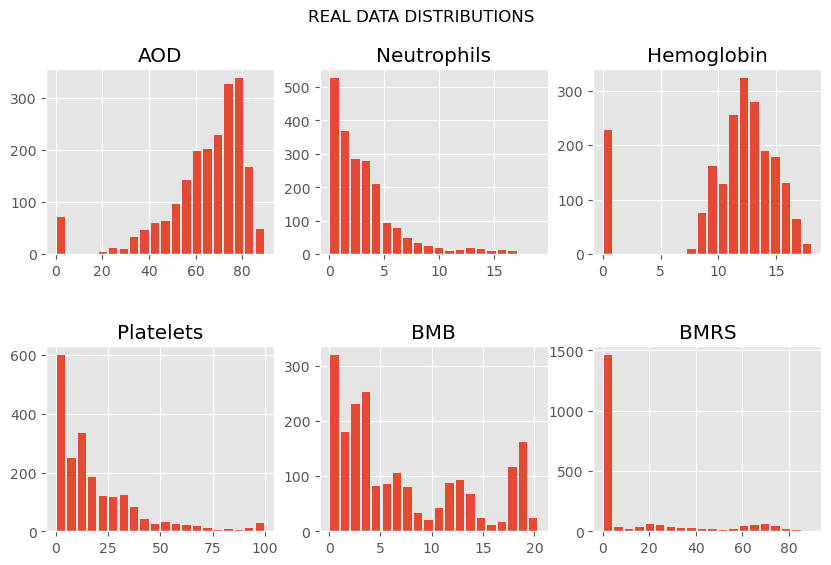

In [7]:
fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('REAL DATA DISTRIBUTIONS')
for n,feature in enumerate(blood_features):
    ax = plt.subplot(2,3,n+1)
    ax.hist(data[feature], bins = 20, rwidth = 0.8)
    ax.set_title(feature)

In [8]:
#generate synt data
from sdv.tabular import GaussianCopula
model = GaussianCopula(primary_key='ID')

In [9]:
model.fit(data)

/home/daniele/anaconda3/lib/python3.9/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/home/daniele/anaconda3/lib/python3.9/site-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale


In [10]:
synt_data = model.sample(len(data))

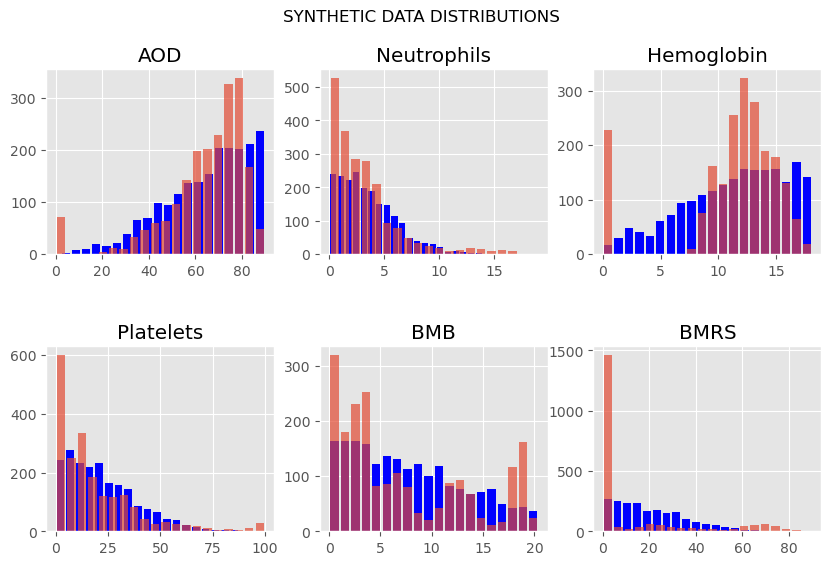

In [11]:
fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('SYNTHETIC DATA DISTRIBUTIONS')
for n,feature in enumerate(blood_features):
    ax = plt.subplot(2,3,n+1)
    ax.hist(synt_data[feature], bins = 20, rwidth = 0.8, color = 'blue', histtype= 'barstacked')
    ax.hist(data[feature], bins = 20, rwidth = 0.8,histtype= 'barstacked', alpha = 0.7)
    ax.set_title(feature)

In [12]:
from sdv.evaluation import evaluate

In [30]:
score = evaluate(synt_data[data.columns[1:]], data[data.columns[1:]]) #index column is different
print('correlation score:',score)

correlation score: 0.9571444708008585


In [25]:
score = evaluate(synt_data[blood_features], data[blood_features])
print('correlation score, only blood features:',score)

correlation score, only blood features: 0.7616250611845325


In [18]:
evaluate(synt_data[col], data[col], aggregate = False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSComplement,Inverted Kolmogorov-Smirnov D statistic,0.761625,0.761625,0.0,1.0,MAXIMIZE,None
1,CSTest,Chi-Squared,NaN,NaN,0.0,1.0,MAXIMIZE,"Cannot find fields of types ('boolean', 'categ..."


In [19]:
metadata = model.get_metadata()

In [20]:
metadata.to_dict()

{'fields': {'ID': {'type': 'id',
   'transformer': 'FrequencyEncoder_noised',
   'subtype': 'string'},
  'Gender': {'type': 'numerical',
   'subtype': 'integer',
   'transformer': 'FloatFormatter'},
  'AOD': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'Neutrophils': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'Hemoglobin': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'Platelets': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'BMB': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'BMRS': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'del5q': {'type': 'numerical',
   'subtype': 'integer',
   'transformer': 'FloatFormatter'},
  'Lossofchr5ordel5qPLUSother': {'type': 'numerical',
   'subtype': 'integer',
   'transformer': 'FloatFormatter'},
  'Lossofchr7ordel7q':

In [21]:
from sdmetrics.reports.single_table import QualityReport

In [22]:
report = QualityReport()

In [23]:
report.generate(data, synt_data, metadata.to_dict())

Creating report:  25%|███████                     | 1/4 [00:00<00:00,  5.85it/s]/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/sit

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

Creating report: 100%|████████████████████████████| 4/4 [00:10<00:00,  2.65s/it]



Overall Quality Score: 96.67%

Properties:
Column Shapes: 95.71%
Column Pair Trends: 97.62%


In [31]:
report.get_details(property_name='Column Shapes').loc[1:6]

,Column,Metric,Quality Score
1,AOD,KSComplement,0.879099
2,Neutrophils,KSComplement,0.857073
3,Hemoglobin,KSComplement,0.857562
4,Platelets,KSComplement,0.810573
5,BMB,KSComplement,0.832110
6,BMRS,KSComplement,0.333333


In [32]:
#let's try to modify some distribution

model = GaussianCopula(
    primary_key = 'ID',
    field_distributions={'BMRS': 'gamma'}
)

model.fit(data)
synt_data = model.sample(len(data))

/home/daniele/anaconda3/lib/python3.9/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/home/daniele/anaconda3/lib/python3.9/site-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale


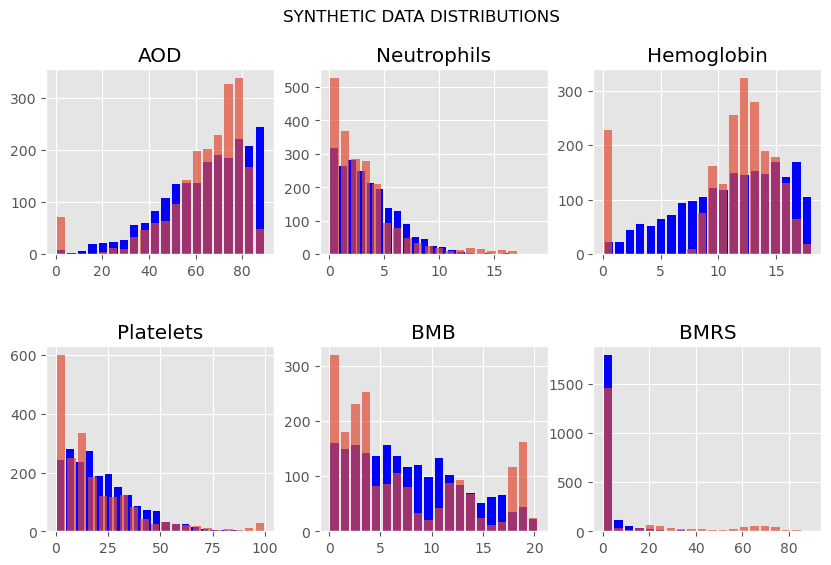

In [33]:
fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('SYNTHETIC DATA DISTRIBUTIONS')
for n,feature in enumerate(blood_features):
    ax = plt.subplot(2,3,n+1)
    ax.hist(synt_data[feature], bins = 20, rwidth = 0.8, color = 'blue', histtype= 'barstacked')
    ax.hist(data[feature], bins = 20, rwidth = 0.8,histtype= 'barstacked', alpha = 0.7)
    ax.set_title(feature)

In [34]:
report = QualityReport()

In [35]:
report.generate(data, synt_data, metadata.to_dict())
report.get_details(property_name='Column Shapes').loc[1:6]

Creating report:  25%|███████                     | 1/4 [00:00<00:00,  6.78it/s]/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/sit

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

Creating report: 100%|████████████████████████████| 4/4 [00:12<00:00,  3.03s/it]



Overall Quality Score: 96.97%

Properties:
Column Shapes: 96.24%
Column Pair Trends: 97.7%


,Column,Metric,Quality Score
1,AOD,KSComplement,0.880078
2,Neutrophils,KSComplement,0.858541
3,Hemoglobin,KSComplement,0.845815
4,Platelets,KSComplement,0.827704
5,BMB,KSComplement,0.810573
6,BMRS,KSComplement,0.778757


In [65]:
#quality is slighty improved

In [36]:
#let's check the counts on genes
col = data.columns[8:]
print('GENE\t\tREAL\t\tSYNTHETIC')
for feature in col:
    print( f'{feature}\t\t{data[feature].value_counts().values}\t\t{synt_data[feature].value_counts().values}')

GENE		REAL		SYNTHETIC
del5q		[1923  120]		[1964   79]
Lossofchr5ordel5qPLUSother		[1945   98]		[2005   38]
Lossofchr7ordel7q		[1920  123]		[1952   91]
Gainofchr8		[1947   96]		[1991   52]
Lossofchr9ordel9q		[2012   31]		[2040    3]
Lossofchr11ordel11q		[1985   58]		[2037    6]
Lossofchr12ordel12port12p		[1968   75]		[2022   21]
Lossofchr13ordel13q		[1999   44]		[2043]
Isochr17qort17p		[1984   59]		[2036    7]
Lossofchr20ordel20q		[1967   76]		[2023   20]
LossofchrY		[1934  109]		[1981   62]
idicXq13		[2036    7]		[2043]
ASXL1		[1664  379]		[1527  516]
ATRX		[2012   31]		[2043]
BCOR		[1911  132]		[1947   96]
BCORL1		[2000   43]		[2040    3]
BRAF		[2032   11]		[2043]
CBL		[1946   97]		[2005   38]
CBLB		[2026   17]		[2043]
CEBPA		[2022   21]		[2043]
DNMT3A		[1809  234]		[1782  261]
ETV6		[1992   51]		[2041    2]
EZH2		[1922  121]		[1970   73]
FBXW7		[2015   28]		[2043]
FLT3		[1982   61]		[2038    5]
GATA2		[2022   21]		[2043]
GNAS		[2025   18]		[2043]
GNB1		[2023   20]		[2043]
IDH1		[1951

In [37]:
#this could all be gamma

distr_dict = {'BMRS': 'gamma'}
for feature in col:
    distr_dict[feature] = 'gamma'

In [38]:
#let's try to modify some distribution

model = GaussianCopula(
    primary_key = 'ID',
    field_distributions=distr_dict
)

model.fit(data)
synt_data = model.sample(len(data))

In [39]:
report = QualityReport()
report.generate(data, synt_data, metadata.to_dict())

Creating report: 100%|████████████████████████████| 4/4 [00:13<00:00,  3.38s/it]


Overall Quality Score: 95.77%

Properties:
Column Shapes: 93.27%
Column Pair Trends: 98.26%


In [40]:
#let's check the counts on genes
col = data.columns[8:]
print('GENE\t\tREAL\t\tSYNTHETIC')
for feature in col:
    print( f'{feature}\t\t{data[feature].value_counts().values}\t\t{synt_data[feature].value_counts().values}')

GENE		REAL		SYNTHETIC
del5q		[1923  120]		[1748  295]
Lossofchr5ordel5qPLUSother		[1945   98]		[1825  218]
Lossofchr7ordel7q		[1920  123]		[1739  304]
Gainofchr8		[1947   96]		[1805  238]
Lossofchr9ordel9q		[2012   31]		[1969   74]
Lossofchr11ordel11q		[1985   58]		[1917  126]
Lossofchr12ordel12port12p		[1968   75]		[1861  182]
Lossofchr13ordel13q		[1999   44]		[1958   85]
Isochr17qort17p		[1984   59]		[1906  137]
Lossofchr20ordel20q		[1967   76]		[1884  159]
LossofchrY		[1934  109]		[1770  273]
idicXq13		[2036    7]		[2033   10]
ASXL1		[1664  379]		[1877  166]
ATRX		[2012   31]		[1975   68]
BCOR		[1911  132]		[1714  329]
BCORL1		[2000   43]		[1946   97]
BRAF		[2032   11]		[2023   20]
CBL		[1946   97]		[1823  220]
CBLB		[2026   17]		[2011   32]
CEBPA		[2022   21]		[1999   44]
DNMT3A		[1809  234]		[2033   10]
ETV6		[1992   51]		[1951   92]
EZH2		[1922  121]		[1717  326]
FBXW7		[2015   28]		[1994   49]
FLT3		[1982   61]		[1898  145]
GATA2		[2022   21]		[2003   40]
GNAS		[2025   18]		[200

In [80]:
#sui geni smbra che il lavoro sia migliore, però l'overall score si è abbassato

In [41]:
#lets try with gan
from sdv.tabular import CTGAN


In [42]:
model = CTGAN(
    primary_key = 'ID',
    epochs = 100
)

#default parameters:
# lr = 2e-4
# noise dim = 128
# batch size = 500
# gen/dis dimensione = 256, 256
# epoch = 300

In [43]:
from time import time

In [44]:
t = time()
model.fit(data)
print(f'{time()-t:.4f}')

144.5374


In [45]:
#impiegati quasi 3 minuti

In [46]:
synt_data = model.sample(len(data))

In [47]:
report = QualityReport()
report.generate(data, synt_data, metadata.to_dict())

Creating report: 100%|████████████████████████████| 4/4 [00:12<00:00,  3.17s/it]


Overall Quality Score: 96.77%

Properties:
Column Shapes: 95.88%
Column Pair Trends: 97.66%


In [20]:
#even more high with more epochs

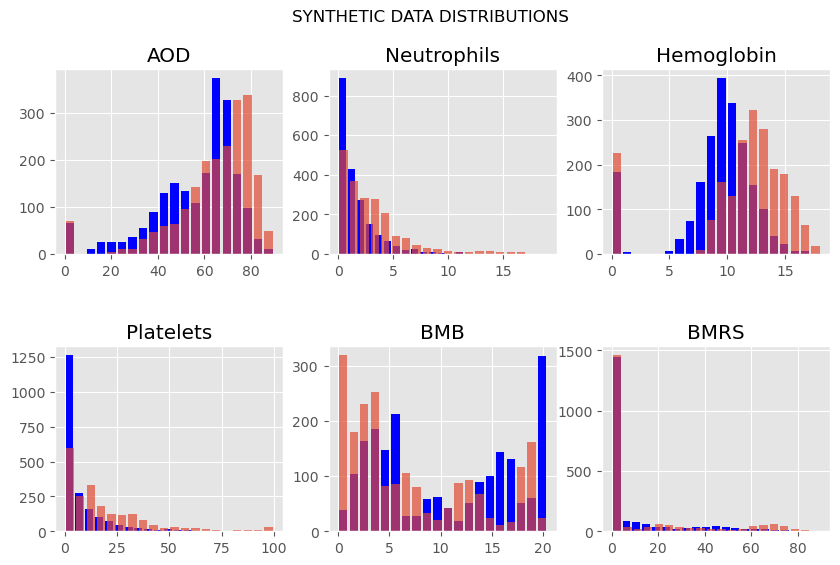

In [48]:
fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('SYNTHETIC DATA DISTRIBUTIONS')
for n,feature in enumerate(blood_features):
    ax = plt.subplot(2,3,n+1)
    ax.hist(synt_data[feature], bins = 20, rwidth = 0.8, color = 'blue', histtype= 'barstacked')
    ax.hist(data[feature], bins = 20, rwidth = 0.8,histtype= 'barstacked', alpha = 0.7)
    ax.set_title(feature)

In [49]:
#lets tri VAE
from sdv.tabular import TVAE

In [53]:
model = TVAE(
    primary_key = 'ID',
    epochs = 300
)

#default values:
# bs = 500
# epochs = 300
# hidden layers size = 128 both decoder and encoder
# embedding dimension = 128
# loss_factor = 2 multiplier of reconstruction error

In [54]:
t = time()
model.fit(data)
print(f'computational time: {time()-t:.4f} seconds')


computational time: 102.2577 seconds


In [55]:
report = QualityReport()
report.generate(data, synt_data, metadata.to_dict())

Creating report: 100%|████████████████████████████| 4/4 [00:14<00:00,  3.65s/it]


Overall Quality Score: 96.77%

Properties:
Column Shapes: 95.88%
Column Pair Trends: 97.66%


In [56]:
from sdv.evaluation import evaluate

In [57]:
evaluate(synt_data[data.columns[1:]], data[data.columns[1:]])

0.9587936292782108

In [58]:
evaluate(synt_data[data.columns[1:]], data[data.columns[1:]], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSComplement,Inverted Kolmogorov-Smirnov D statistic,0.958794,0.958794,0.0,1.0,MAXIMIZE,None
1,CSTest,Chi-Squared,NaN,NaN,0.0,1.0,MAXIMIZE,"Cannot find fields of types ('boolean', 'categ..."


In [59]:
#letstry CopulaGAN

from sdv.tabular import CopulaGAN

In [60]:
model = CopulaGAN( primary_key = 'ID', 
                 field_distributions = {'BMRS': 'gamma'},
                 epochs = 100)

In [61]:
t = time()
model.fit(data)
print('computational time:',time()-t)

computational time: 146.32332825660706


In [62]:
synt_data = model.sample(len(data))

In [63]:
report = QualityReport()
report.generate(data, synt_data, metadata.to_dict())

Creating report:  25%|███████                     | 1/4 [00:00<00:00,  7.23it/s]/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/sit

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons

/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/home/daniele/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: Cons


Overall Quality Score: 96.47%

Properties:
Column Shapes: 95.58%
Column Pair Trends: 97.37%


In [64]:
report.get_score()

0.9647168190114745

In [66]:
scores_df = report.get_details(property_name='Column Shapes')

In [67]:
scores_df.head()

,Column,Metric,Quality Score
0,Gender,KSComplement,0.959373
1,AOD,KSComplement,0.829173
2,Neutrophils,KSComplement,0.842389
3,Hemoglobin,KSComplement,0.901615
4,Platelets,KSComplement,0.846794


In [69]:
scores_df[scores_df['Quality Score']<0.82]

,Column,Metric,Quality Score
54,SRSF2,KSComplement,0.819873


In [72]:
scores_df[scores_df['Quality Score']>0.99]

,Column,Metric,Quality Score
15,Isochr17qort17p,KSComplement,0.992658
18,idicXq13,KSComplement,0.996574
23,BRAF,KSComplement,0.995105
25,CBLB,KSComplement,0.991679
31,FLT3,KSComplement,0.994126
32,GATA2,KSComplement,0.990210
33,GNAS,KSComplement,0.991189
34,GNB1,KSComplement,0.990210
44,NRAS,KSComplement,0.994616
45,PHF6,KSComplement,0.995595


In [79]:
my_meta = metadata.add_table('data',data=data, primary_key = 'ID')

AttributeError: 'Table' object has no attribute 'add_table'

In [78]:
metadata.to_dict()

{'fields': {'ID': {'type': 'id',
   'transformer': 'FrequencyEncoder_noised',
   'subtype': 'string'},
  'Gender': {'type': 'numerical',
   'subtype': 'integer',
   'transformer': 'FloatFormatter'},
  'AOD': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'Neutrophils': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'Hemoglobin': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'Platelets': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'BMB': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'BMRS': {'type': 'numerical',
   'subtype': 'float',
   'transformer': 'FloatFormatter'},
  'del5q': {'type': 'numerical',
   'subtype': 'integer',
   'transformer': 'FloatFormatter'},
  'Lossofchr5ordel5qPLUSother': {'type': 'numerical',
   'subtype': 'integer',
   'transformer': 'FloatFormatter'},
  'Lossofchr7ordel7q':